# Simultaneous Equation Models

#### Application of Phillip's Model to Predict United States' Wage & Consumer Price Index using Two Step Least Square Regression
---
### *Final Project for the Econometrics Class*
---
Dibuat oleh:
- Christopher Timothy   (23101910029)
- Dennis Jonathan       (23101910027)
- Justin Jedidiah       (23101910024)

**Group 2 - Business Mathematics 2019B**

In this opportunity, we are trying to analyze how some economics variable might affect the Consumer Price Index and the Wage of the people of the United States of America. The model that we will be using is based on that created by an economist called [William Phillips](https://en.wikipedia.org/wiki/William_Phillips_(economist)). We will test if the given model is indeed the best model for the scenario. the model will be:


$\dot{W}_t=\alpha_{0}+\alpha_{1}\text{UN}_t+\alpha_{2}{\dot{P}}_t+u_{1t}$

$\dot{P}_t=\beta_{0}+\beta_{1}\dot{W}_t+\beta_{2}\dot{R}_t+\beta_{3}\dot{M}_t+u_{2t}$


**Where**:
- $\dot{W}$ = Money Wages
- $UN$ = Unemployment Rate, % 
- $\dot{P}$ = Price
- $\dot{R}$ = Rate of Change of Cost of Capital 
- $\dot{M}$ = Prices of Imported Raw Material 
- $t$ = Time 
- $u_1,u_2$= Stochastic Disturbances 

For our analysis, we will be using the Consumer Price Index or often refered as CPI as the variable price ($\dot{P}$). As we can see from the equations above, the variables which indicate Consumer Price Index ($\dot{P}_t$) at a certain period and Money Wages ($\dot{W}_t$) at a certain period depends on each other, meaning that to find the Consumer Price Index at that particular time, we will need to find the value for Wage Price at that particular time, and *vice versa*. The aforementioned equations is called as *Simultaneous Equation* and models containing those types of equations is called *Simultaneous Equation Model*. Thus according to Gudjarati ($2009$), the use of *Ordinary Least Square* might not be the way to go since it does not account the fact that in the equation, there might be variables which are correlated to the residual term for the particular equation. We instead will be using *Two Staged Least Square* in order to form the model and predict the parameter values based on our data set.

The data we will be using are based from two sources. For Consumer Price Index ($\dot{P}_t$), Unemployment Rate ($\dot{UN}_t$), Money Wages ($\dot{W}_t$), Prices of Imported Raw Material ($\dot{R}_t$), the data was procured from [United States Bureau of Labor Statistics](https://data.bls.gov/), while Cost of Capital was be taken from [NYU Stern School of Businesses](http://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/wacc.html). The analysis will be done using the programming language *Python* using the website [Deepnote](deepnote.com).

## 1. Prerequisites

### 1.1. Installing the Libraries
Since there are some libraries that are not directly available on the Deepnote  we need to use the `!pip install` function to download and install the libraries that are not in the virtual machine we are using. This step is an optional step.

In [1]:
# Installing libraries
!pip install statsmodels
!pip install openpyxl
!pip install xlrd
!pip install pandas_datareader
!pip install linearmodels

### 1.2. Importing the Libraries
After doing `!pip install`, we will import the required libraries into our workspace. In general, there are three categories of libraries that we use, namely library to process data, libraries to perform graphical analysis, and finally libraries to perform modeling.

Setting `%matplotlib inline` is used so that all the graphs that have been raised will be visible in the work area that we use while also saving the graphs that we have created.

In [2]:
# Importing the data processing libraries
import pandas as pd
import numpy as np

# Importing plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices

# Importing modelling libraries
import statsmodels.api as sm
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from linearmodels.iv import IV2SLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import normaltest
from statsmodels.stats.diagnostic import het_breuschpagan

# Shutting off warnings
import warnings
warnings.filterwarnings("ignore")

# Matplotlib settings
%matplotlib inline

### 1.3. Identification Problem
The first step in doing analysis of Simultaneous Equation Models is finding out whether we can actually predict the value of the parameters for our equations or often called as *Identification Problem*. Gujarati ($2009$) proposes two ways of of solving identification problem:

1. **Order Condition** --> Using the amount variables to determine the identification
2. **Rank Condition** --> Using the determinant of a certain matrix which is constructed in a specific way or alternatively finding the rank of that matrix.

As a reminder, our equations are:

$\dot{W}_t=\alpha_{0}+\alpha_{1}\text{UN}_t+\alpha_{2}{\dot{P}}_t+u_{1t}$

$\dot{P}_t=\beta_{0}+\beta_{1}\dot{W}_t+\beta_{2}\dot{R}_t+\beta_{3}\dot{M}_t+u_{2t}$


**Where**:
- $\dot{W}$ = Money Wages
- $UN$ = Unemployment Rate, % 
- $\dot{P}$ = Price
- $\dot{R}$ = Rate of Change of Cost of Capital 
- $\dot{M}$ = Prices of Imported Raw Material 
- $t$ = Time 
- $u_1,u_2$= Stochastic Disturbances 


#### 1.3.1. Order Condition
Using Order Condition, we can determine whether an equation is either *underidentified*, *exactly identified*, and *overidentied*. But first, since our equations contain dependent variables, we need to know the values for three variables, those variables are:
- $K$ --> The number of pre-determined variables in our system (entire model)
- $k$ --> The number of pre-determined variables in our equation
- $m$ --> The number of dependent variables in our equation

The formula we will be using is 

$$K-k \geq m-1 $$

and if the value of $K-k$ is greater than $m-1$, that equation is overidentified. If it less, the equation is underidentified. If it is equal, then it is exactly identified.

**Equation 1 (Wage):**

$$K-k \geq m-1 <=>$$

$$3-1\geq2-1 \space\space\space<=>$$

$$2\geq1     $$

*Overidentified (>)*

**Equation 2 (CPI):**

$$K-k\geq m-1 <=>$$

$$3-2\geq2-1 \space\space\space<=>$$

$$1\geq1     $$

*Exactly identified (=)*



#### 1.3.2. Rank Condition
Rank Condition involves a matrix which is constructed by temporarily "eliminating" the equation we are testing and choosing values from parameters that our test equation does not have but others do. After that, we will either find the determinant of the matrix (if it is possible) or find the rank of the matrix. The rule for determinant is:

$$det(A)\neq 0$$

While the rule if we decide on using rank is:

$$rank(A) \geq M-1$$

Where $A$ is the matrix we are using and $M$ is the number of endogeneous variables in our system.

Rank condition can only determine whether our equation is identified or not, thus complementing the result of Order Condition.

First and foremost, we will create a matrix of parameters from each variables for both equations above. Since we do not know the exact value of the parameter (if the parameter itself exists on the equation), we will be denoting the values as **x** if it exists and $0$ if it does not. After that, we will proceed on checking the first equation.

In [3]:
# Creating the matrix
w_ = 'x','x'
un_ = 'x',0
p_ = 'x','x'
r_ = 0,'x'
m_ = 0,'x'
model = pd.DataFrame({'w':w_,'un':un_,'p':p_,'r':r_,'m':m_},index=['Eq. 1','Eq. 2'])
model

,w,un,p,r,m
Eq. 1,x,x,x,0,0
Eq. 2,x,0,x,x,x


In [4]:
# Test for model 1
pd.DataFrame(model[['r','m']].iloc[1]).T

,r,m
Eq. 2,x,x


**Testing the Wage Model:**

Rank is 1

$$ \text{Rank}>=M-1 <=>$$

$$ 1>=1 $$

*Equation 1 is identified*

In [5]:
# Test for model 2
pd.DataFrame(model[['un']].iloc[0]).T

,un
Eq. 1,x


**Testing the CPI Model:**

Rank is 1

$$ \text{Rank}>=M-1 <=>$$

$$ 1>=1 $$

*Equation 2 is identified*

### 1.4. Importing the Data
In this stage, we will import the data into our notebook. As mentioned previously, the data we will be using are based from two sources. For Consumer Price Index ($\dot{P}_t$), Unemployment Rate (${UN}_t$), Money Wages ($\dot{W}_t$), Prices of Imported Raw Material ($\dot{M}_t$), the data was procured from [United States Bureau of Labor Statistics](https://data.bls.gov/), while Cost of Capital ($\dot{R}_t$) was be taken from [NYU Stern School of Businesses](http://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/wacc.html). We will be importing the data one by one since there are some data cleaning that we need to do.

#### 1.4.1. Unemployment Rate (${UN}_t$)
We will import the data using the function `pd.read_excel()`. When we checked `UN.xlsx` in our spreadsheet software, we found that the first $11$ rows does not contain the particular information that we need to analyze (specifically it contains the description of the dataset). By adding the parameter `skiprows = 11`, we are skipping the things that we do not need and get straight to those we do.

In [6]:
# Importing the dataset
un = pd.read_excel('Dataset//UN.xlsx',skiprows = 11)

In [7]:
# Previewing the data
un.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1979,5.9,5.9,5.8,5.8,5.6,5.7,5.7,6.0,5.9,6.0,5.9,6.0
1,1980,6.3,6.3,6.3,6.9,7.5,7.6,7.8,7.7,7.5,7.5,7.5,7.2
2,1981,7.5,7.4,7.4,7.2,7.5,7.5,7.2,7.4,7.6,7.9,8.3,8.5
3,1982,8.6,8.9,9.0,9.3,9.4,9.6,9.8,9.8,10.1,10.4,10.8,10.8
4,1983,10.4,10.4,10.3,10.2,10.1,10.1,9.4,9.5,9.2,8.8,8.5,8.3


The table above contain the values for our dataset. As we can see, each row represents a year and the columns for each row represent the months in the year. This format is not desireable for us, thus we will transform the values for each columns in the year into its own separate entry using the function `pd.melt()` and it will result in a dataframe with three columns, which are `year`,`month`,and `value`. Then we will rename the columns into lowercase and replace spaces with '**_**'.

We will also map the values for the months into numerical order (January will be denoted as $01$) and we will sort it according to the `year` and `month` column. Finally, we will drop data from the year $2021$ since it is incomplete as the year has not ended.

In [8]:
# Changing the dataframe format from columns into rows
un_clean = pd.melt(un, id_vars=['Year'], value_vars=un.columns.drop('Year')).sort_values('Year')

# Renaming the columns
un_clean.rename({'variable':'month','value':'unemployment','Year':'year'},axis=1,inplace=True)

# Mapping the corresponding months
mapper = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
un_clean['month'] = un_clean['month'].map(mapper)

# Sorting the dataframe
un_clean = un_clean.sort_values(['year','month'])

# Resetting the dataframe's index
un_clean = un_clean.reset_index(drop=True)

# Slicing the unecessary entries
un_clean = un_clean[un_clean['year']!= 2021]

In [9]:
# Previewing the changes
un_clean.head()

,year,month,unemployment
0,1979,1,5.9
1,1979,2,5.9
2,1979,3,5.8
3,1979,4,5.8
4,1979,5,5.6


#### 1.4.2. Wage ($\dot{W}_t$)
The dataset for wage is available in the file `W.xlsx`. This file also contains information we do not need for the first $11$ rows, thus it would be sensible to treat it exactly the same with the previous data set. The wage dataset was taken from the US 'Employment, Hours, and Earnings from the Current Employment Statistics survey (National)' metric.

In [10]:
# Importing the dataset
w = pd.read_excel('Dataset//W.xlsx',skiprows = 11)

In [11]:
# Previewing the data
w.head()

,Year,Period,Label,Observation Value,1-Month % Change
0,1979,M01,1979 Jan,88808,0.2
1,1979,M02,1979 Feb,89055,0.3
2,1979,M03,1979 Mar,89479,0.5
3,1979,M04,1979 Apr,89417,-0.1
4,1979,M05,1979 May,89789,0.4


As we can see from the first five rows of the dataset, there are more informations we do not need for analysis. The `Label` column essentialy gives the same information as the column `Year` and `Period` combined, thus it would be sensible to drop it. We will also remove '**M**' from each entries on the `Period` column to transform the column into numerical values.

Per usual, we will be renaming the column names and also dropping entries from $2021$.

In [12]:
# Dropping the unecessary column
w_clean = w.drop('Label',axis=1)

# Reformating the period column
w_clean['Period'] = w_clean['Period'].str.replace('M','').astype(int)

# Renaming the columns
w_clean.rename({'Year':'year','Period':'month',
                'Observation Value':'wage','1-Month % Change':'change_wage'},
                inplace=True,axis=1)

# Slicing the unecessary entries
w_clean = w_clean[w_clean['year']!= 2021]

In [13]:
# Previewing the changes
w_clean.head()

,year,month,wage,change_wage
0,1979,1,88808,0.2
1,1979,2,89055,0.3
2,1979,3,89479,0.5
3,1979,4,89417,-0.1
4,1979,5,89789,0.4


#### 1.4.3. Price of Imported Raw Material ($\dot{M}_t$)
The dataset for wage is available in the file `Mnew.xlsx`. This file also contains information we do not need for the first $8$ rows, thus we will use the same function but with the parameter `skiprows = 8`. This dataset was taken from the metric "Monthly import price index for NAICS 33392, Material handling equipment manufacturing, not seasonally adjusted" from U.S. Bureau of Labor Statistics. This variable will be the only variable which we will make the rate of change of, thus we will use the method `.pct_change().mul(100)` to create the necessary changes.

In [14]:
# Importing the dataset
m = pd.read_excel('Dataset//M.xlsx',skiprows = 8)

In [15]:
# Previewing the data
m.head()

,Year,Period,Label,Observation Value
0,2005,M12,2005 Dec,100.0
1,2006,M01,2006 Jan,101.8
2,2006,M02,2006 Feb,101.9
3,2006,M03,2006 Mar,102.1
4,2006,M04,2006 Apr,105.4


This dataset has the exact same format as the wage dataset, thus we will apply the exact same treatment to the `Label` and `Period` column, and also renaming the column names. The difference is that we can see on our spreadsheet software that for the entries up to $1989$, the column `1-Month % Change` is NaN, thus we will select data starting from $1989$ up to $2020$.


In [16]:
# Dropping the unecessary column
m_clean = m.drop('Label',axis=1)

# Reformating the period column
m_clean['Period'] = m_clean['Period'].str.replace('M','').astype(int)

# Renaming the columns
m_clean.rename({'Year':'year','Period':'month',
                'Observation Value':'raw_mat'},
                inplace=True,axis=1)
m_clean['raw_mat']=m_clean['raw_mat'].pct_change().mul(100)
# Slicing data unecessary data
m_clean = m_clean[(m_clean['year'] >= 2005) & (m_clean['year'] != 2021)]

In [17]:
# Previewing the changes
m_clean.head()

,year,month,raw_mat
0,2005,12,NaN
1,2006,1,1.800000
2,2006,2,0.098232
3,2006,3,0.196271
4,2006,4,3.232125


#### 1.4.4. Prices ($\dot{P}_t$)
The data for Consumer Price Index or CPI is available from the file `P_lama.xlsx`. The first 11 rows are not really useful for our as they are only the descriptions of the dataset therefore skipping the first $11$ rows is our decision. The consumer price index was taken from the metric "CPI for All Urban Consumers (CPI-U) 1982-1984=100 (Unadjusted)".

In [18]:
# Importing the dataset
p = pd.read_excel('Dataset//P.xlsx',skiprows = 11)

In [19]:
# Previewing the data
p.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,1979,68.3,69.1,69.8,70.6,71.5,72.3,73.1,73.8,74.6,75.2,75.9,76.7,NaN,NaN
1,1980,77.8,78.9,80.1,81.0,81.8,82.7,82.7,83.3,84.0,84.8,85.5,86.3,NaN,NaN
2,1981,87.0,87.9,88.5,89.1,89.8,90.6,91.6,92.3,93.2,93.4,93.7,94.0,NaN,NaN
3,1982,94.3,94.6,94.5,94.9,95.8,97.0,97.5,97.7,97.9,98.2,98.0,97.6,NaN,NaN
4,1983,97.8,97.9,97.9,98.6,99.2,99.5,99.9,100.2,100.7,101.0,101.2,101.3,NaN,NaN


After previewing the first five entries, we can clearly see that the format for this dataset is similar to the unemployment dataset, thus we can use the `pd.melt()` function to transpose the dataset into our desired form. There are also two columns that we can drop and those are `HALF1` and `HALF2`. As usual, we will renaming the column names, sorting the values based on `month` and `year`, resetting the index and dropping entries from $2021$.

In [20]:
# Dropping the unecessary columns
p_clean = p.drop(['HALF1','HALF2'],axis=1)

# Changing the dataframe format from columns into rows
p_clean = pd.melt(p_clean, id_vars=['Year'], value_vars=p_clean.columns.drop('Year'))

# Renaming the columns
p_clean.rename({'variable':'month','value':'cpi','Year':'year'},axis=1,inplace=True)

# Mapping the corresponding months
p_clean['month'] = p_clean['month'].map(mapper)

# Sorting the dataframe
p_clean = p_clean.sort_values(['year','month'])

# Resetting the dataframe's index
p_clean = p_clean.reset_index(drop=True)

# Slicing the unecessary entries
p_clean = p_clean[p_clean['year']!= 2021]

#### 1.4.5 Rate of Change of Cost of Capital ($\dot{R}_t$)
The data for change of capital is available `R.xlsx`. The data is taken from STERN and the data itself is taken in a yearly interval. First we can read it in using `pd.read_excel()`.

In [21]:
# Importing the dataset
r = pd.read_excel('Dataset//R.xlsx')

In [22]:
# Previewing the data
r.head()

,Year,Cost of Capital (%)
0,1999,9.43
1,2000,8.89
2,2001,9.12
3,2002,8.94
4,2003,7.57


Since the data available on the site is in yearly intervals while our data so far is in monthly intervals, we will assume that the value for each month of the year is the same as its yearly value. We will duplicate the yearly value by $12$ and assign the values into a list called `temp`.

In [23]:
# Extracting the value from the cost capital column
temp = list()
r_clean = r[r['Year']>2005]
r_clean = r_clean.reset_index()
for i in range(len(r_clean['Year'])):
    tempe = r_clean['Cost of Capital (%)'][i]
    for j in range(12):
        temp.append(tempe)

#### 1.4.6 Combining Dataframe
We will now combine the previous datasets into one dataframe called `combined` using the method `.merge()` on the `year` and `month` using the method `outer` (outer join preserve all the column on every dataset). After that we will drop columns that we do not need and drop entries before the year 1999. Next we will reset the index of `combined` and also append the value of `temp` as a column in `combined`

In [24]:
# Combining all the data into one dataframe
combined = w_clean.merge(un_clean,on=['year','month'],how='outer')
combined = combined.merge(p_clean,on=['year','month'],how='outer')
combined = combined.merge(m_clean,on=['year','month'],how='outer')

# Dropping unnecessary columns
combined.drop(['change_wage'], axis = 1, inplace = True)

# Slicing the data
combined = combined[combined['year']>=2006]

# Resetting the index
combined = combined.reset_index(drop=True)

# Appending the cost of capital values into the dataframe
combined['cost_capital']=temp

In [25]:
# Previewing the data
combined.head()

,year,month,wage,unemployment,cpi,raw_mat,cost_capital
0,2006,1,135429,4.7,198.3,1.800000,8.73
1,2006,2,135737,4.8,198.7,0.098232,8.73
2,2006,3,136047,4.7,199.8,0.196271,8.73
3,2006,4,136205,4.7,201.5,3.232125,8.73
4,2006,5,136244,4.6,202.5,1.328273,8.73


Since our dataset is based on several time series data, we will replace the index using the available dates from `year` and `month` as well as assuming that the data is taken from the first day of the month.

In [26]:
# Creating a time series index fom year and month
combined['dates'] = [pd.datetime(year = year,month = month,day = 1) for year,month in zip(combined.year,combined.month)]
combined.set_index('dates',inplace = True)

### 1.5. Dataset Dimension

In [27]:
# Previewing the data dimension
print('The data has {p1} rows and {p2} columns'.format(p1 = combined.shape[0], p2 = combined.shape[1]))

The data has 180 rows and 7 columns


After conducting the cleaning process, our data set contains $264$ rows and $7$ columns, those columns are:
- `year`
- `month`
- `wage`
- `unemployment`
- `cpi`
- `raw_mat`
- `cost_capital`

Each row in the dataset represents the monthly entries for those $7$ columns.

### 1.6. Checking for Null Values

In [28]:
# Finding nulls for each column
combined.isnull().sum()

year            0
month           0
wage            0
unemployment    0
cpi             0
raw_mat         0
cost_capital    0
dtype: int64

Checking for NaN or Null Values is an important step in data cleaning as it might inhibit the analysis of the dataset itself. We can see that every column in our dataframe contains no NaN entries.

## 2. Data Exploration

### 2.1. Getting the Datatypes

In [29]:
# Finding the type of the data
combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2006-01-01 to 2020-12-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          180 non-null    int64  
 1   month         180 non-null    int64  
 2   wage          180 non-null    int64  
 3   unemployment  180 non-null    float64
 4   cpi           180 non-null    float64
 5   raw_mat       180 non-null    float64
 6   cost_capital  180 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 11.2 KB


From the `.info()` method we can see that the data have $264$ entries/rows, thus confirming the result above. The dataframe also have a datetime type data as the index. We can see that the data starts from $\text{January}\space1999$ until $\text{December}\space2020$. The data types for each columns are already numerical datatype, making it relatively easier to analyze, graph plots and aggregate the data.

### 2.2. Descriptive Statistics
We will be looking at descriptive statistics from the data we have. Descriptive statistics that can be checked are:

1. Amount of Data
2. Average
3. Standard Deviation
4. Minimum data
5. Quartile $1$-$3$
6. Maximum data

We can use the `df.describe()` function to easily generate descriptive statistics.

In [30]:
# Descriptive statistics
combined.describe().drop(['year','month'],axis = 1)

,wage,unemployment,cpi,raw_mat,cost_capital
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,139292.994444,6.308333,231.251639,0.228263,8.352667
std,6453.449983,2.221200,17.042177,1.262826,1.596603
min,129698.000000,3.500000,198.300000,-9.228442,5.870000
25%,134288.000000,4.575000,216.727500,-0.134774,6.940000
50%,137980.500000,5.550000,233.059000,0.069013,8.200000
75%,144242.750000,8.200000,243.981750,0.414666,10.000000
max,152523.000000,14.800000,260.474000,8.090075,11.090000


From the description above we need to check the count, mean & standard deviation, minimum and maximum values.
* The count of all the columns are the same as the number of rows which is $180$. 
* The std. deviation of the columns are not too big relative to the mean except for `raw_mat`.
* There is no peculiar minimum maximum values such as negative values or infinity which is good.

### 2.3. Finding Outliers
The use of boxplots in analyzing the data is very important. Boxplot helps us to describe the range of the data we have, therefore, the data that we consider as outliers will be seen clearly. To generate a boxplot graph we use the `sns.boxplot()` function from the library `seaborn`.

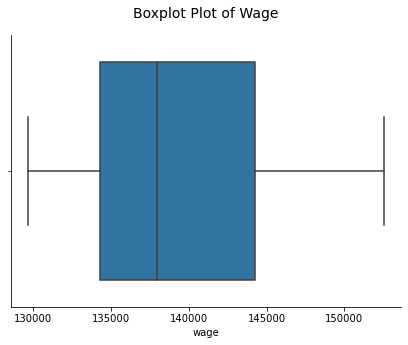

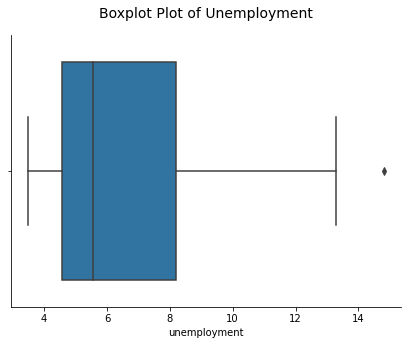

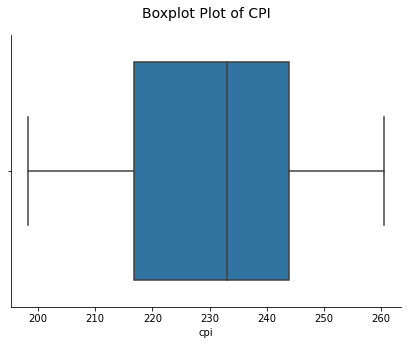

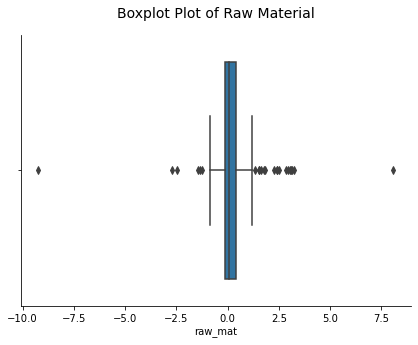

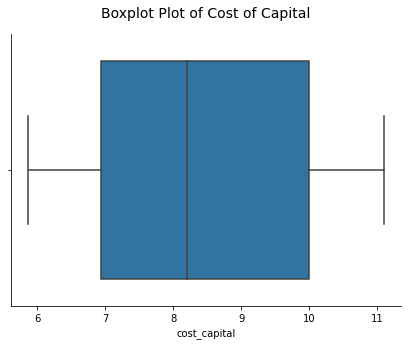

In [31]:
for col in combined.columns.drop(['year','month']):
    # Plotting a boxplot
    fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
    sns.boxplot(combined[col],ax = ax1)
    
    # Plot settings
    if col =='cpi':
        col = 'CPI'
    elif col == 'raw_mat':
        col = 'Raw Material'
    elif col== 'cost_capital':
        col = 'Cost of Capital'
    else: col = col.capitalize()
    plt.title('Boxplot Plot of {}'.format(col),fontsize = 14,y = 1.04)
    sns.despine()

    plt.show()

As we can see from the boxplot above, there is an outlier in `unemployment` column. Therefore, we cut off the outlier to make the dataset better.

There are a lot of outliers in the `raw_mat` column but we will not remove them since the data is derived by taking the monthly changes percentage of raw material import. Therefore many outliers are to be expected.

In [32]:
# Dropping the outliers from unemployment
combined = combined[combined['unemployment'] <= 14]

### 2.4. Quantile - Quantile Plot and Distribution Plot
Normal Q-Q plot is a scatter plot which is used to check whether a sample distribution follows a certain distribution and this time the we will check whether the data distribution follows a normal distribution. If the distribution of the points follows the reference line, it can be said that the data held is normally distributed. To be able to find QQ-plot, we use the `sm.qqplot()` function from the library `statsmodels.api`.

We can also use Kernel Density Estimate plot to see the exact distribution of the dataset. The function to do so is `sns.kdeplot()` which is taken from the `seaborn` library.

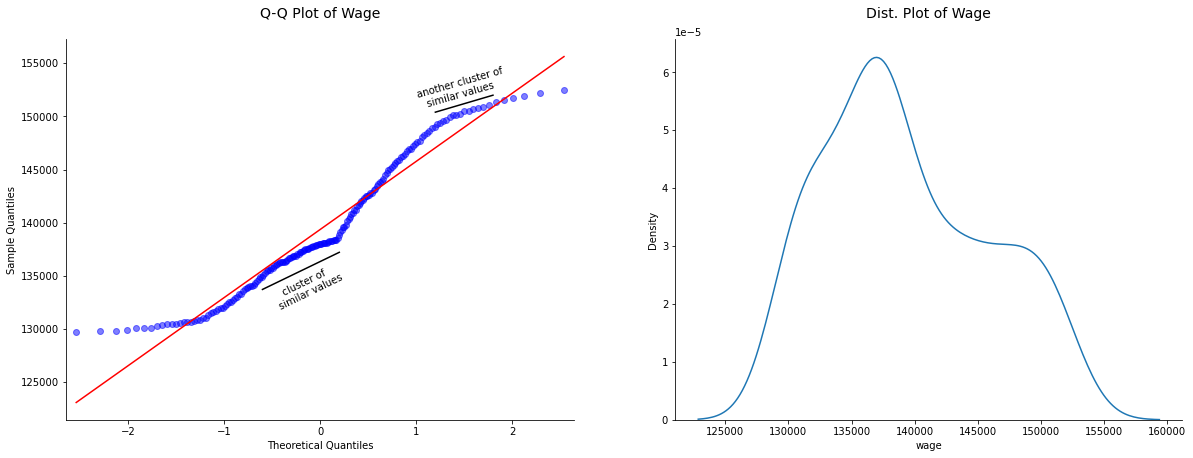

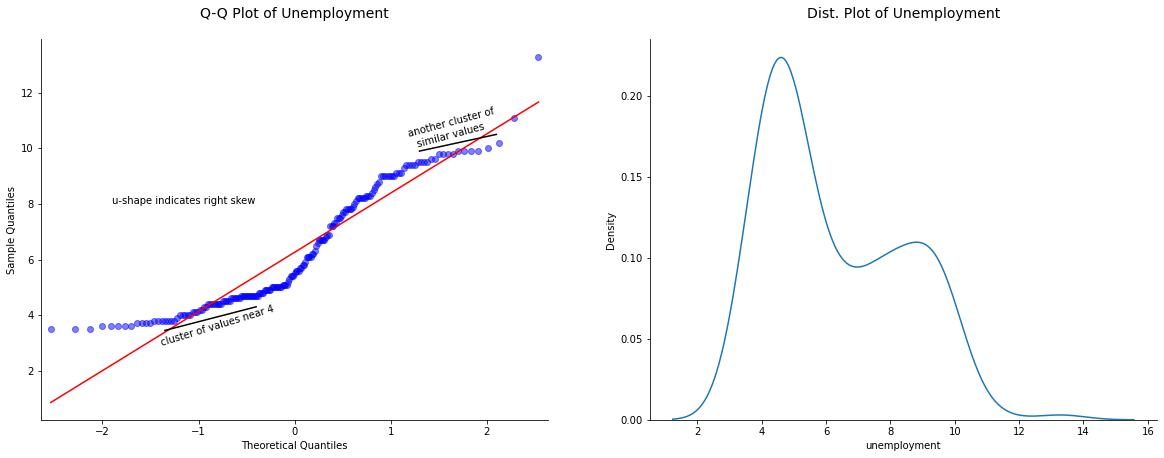

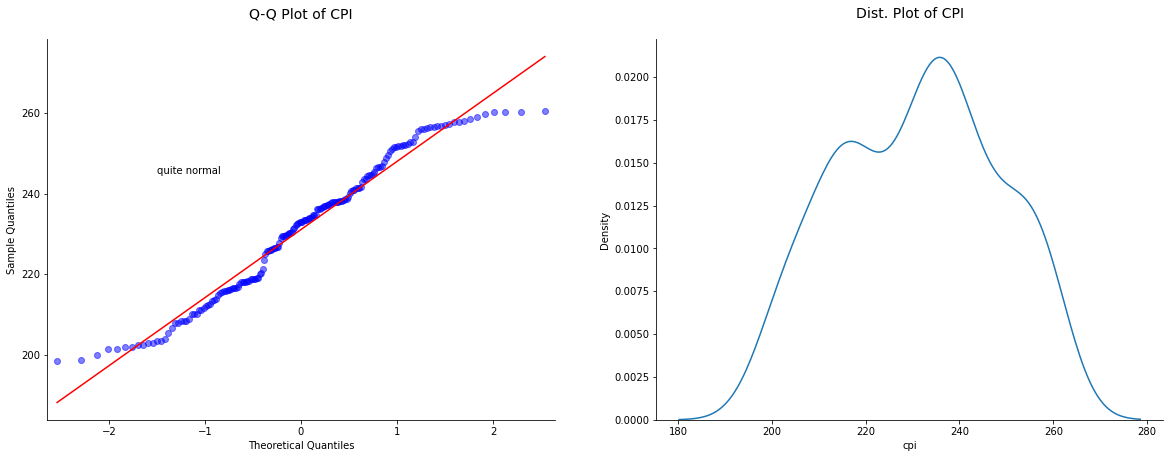

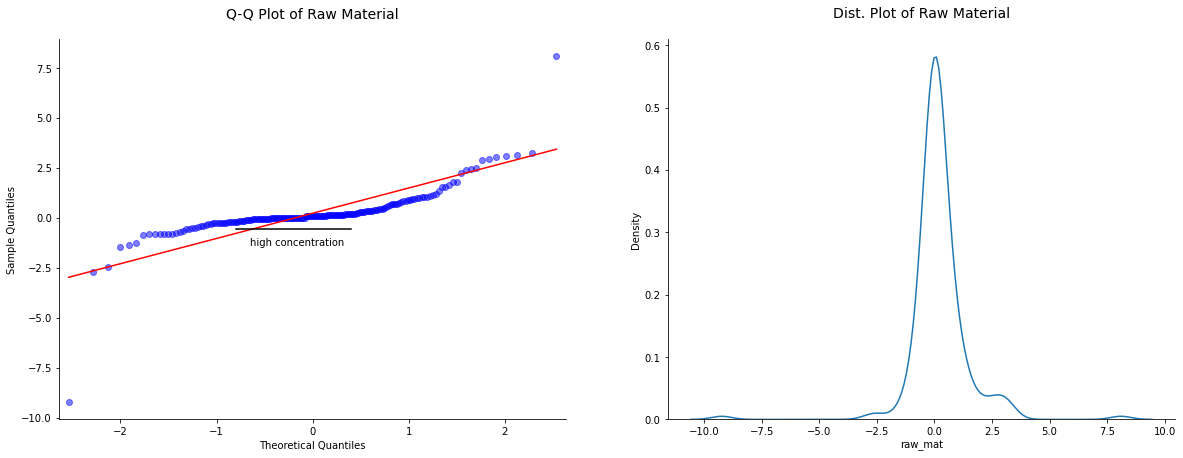

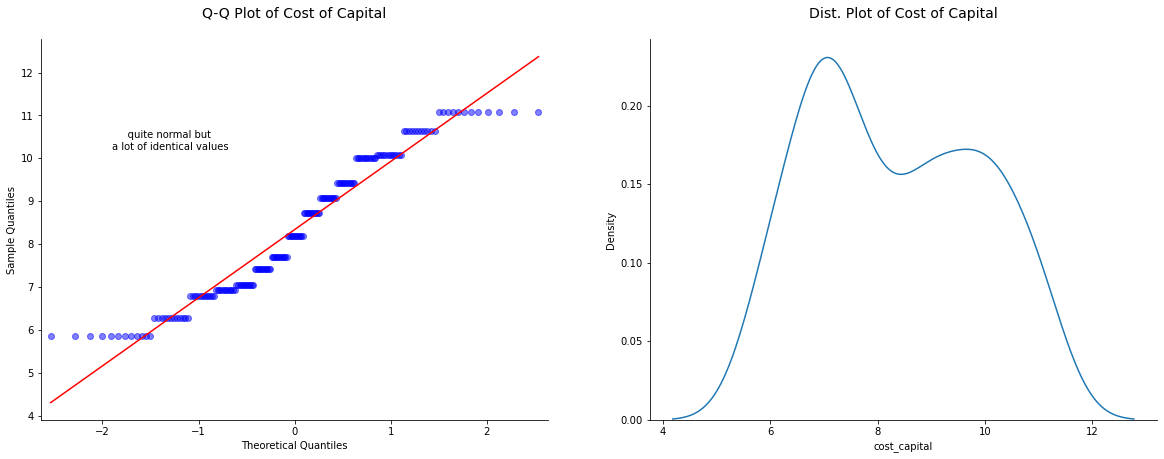

In [33]:
for i in combined.columns.drop(['year','month']).tolist():
    # Plotting a qqplot
    fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,7))
    sm.qqplot(combined[i],line ='s',ax = ax1,alpha=0.5)
    sns.kdeplot(combined[i],ax = ax2)

    # Annotating the plots
    if i == 'wage':
        x = -0.2
        y = 131500
        ax1.annotate('   cluster of\nsimilar values',xy=(x-0.3,y+300),rotation=26)
        ax1.plot([x-0.4,x+0.4],[y+2200,y+5700],color='black')

        x = 1
        y = 147000
        ax1.annotate('another cluster of\n  similar values',xy=(x,y+3700),rotation=16)
        ax1.plot([x+0.2,x+0.8],[y+3400,y+5000],color='black')
    elif i == 'unemployment':
        x = -1.9
        y = 8
        ax1.annotate('u-shape indicates right skew',xy=(x,y))

        x = -1
        y = 3.4
        ax1.annotate('cluster of values near 4',xy=(x-0.4,y-0.5),rotation=17)
        ax1.plot([x-0.35,x+0.6],[y+0.05,y+0.9],color='black')

        x = 1.1
        y = 10
        ax1.annotate('another cluster of\n  similar values',xy=(x+0.07,y),rotation=15)
        ax1.plot([x+0.2,x+1],[y-0.1,y+0.5],color='black')
    elif i == 'cpi':
        x = -1.5
        y = 245
        ax1.annotate('quite normal',xy=(x,y))
    elif i == 'raw_mat':
        x = -0.5
        y = -1.4
        ax1.annotate('high concentration',xy=(x-0.15,y))
        ax1.plot([x-0.3,x+0.9],[y+0.85,y+0.85],color='black')
    elif i == 'cost_capital':
        x = -1.9
        y = 10.2
        ax1.annotate('     quite normal but\na lot of identical values',xy=(x,y))

    # Plot settings
    if i =='cpi':
        i = 'CPI'
    elif i == 'raw_mat':
        i = 'Raw Material'
    elif i== 'cost_capital':
        i = 'Cost of Capital'
    else: i = i.capitalize()

    ax1.set_title('Q-Q Plot of {}'.format(i),fontsize = 14,y = 1.04)
    ax2.set_title('Dist. Plot of {}'.format(i),fontsize = 14,y = 1.04)
    sns.despine()
    plt.show()

From the graphs above we can conclude the following:

1. Both `wage` and `unemployment` are right skewed or positively skewed.
2. `cpi` is very close to a perfect normal distribution.
2. `raw_mat` have a very high kurtosis.
3. `cost_capital` have a lot of identical values because it was an annual data turned into monthly.

### 2.5. Pairplot
We will now use `sns.pairplot()` to see the correlation between the columns as well as the distribution of those columns in the diagonal or position **\[i,i\]** using **kernel density estimation**.

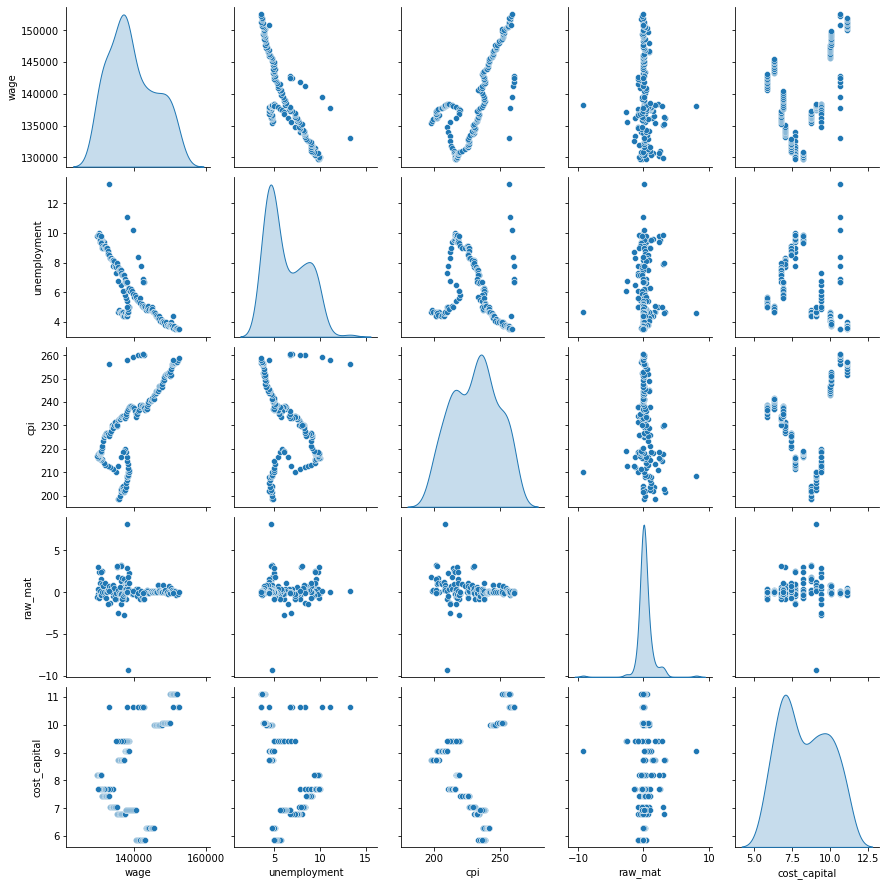

In [34]:
sns.pairplot(combined.drop(['year','month'],axis = 1), diag_kind='kde')
plt.show()

From the pairplots, we can see that the majority of the pairs have a non-linear relationship between each other.

Next, we will focus on the `wage` and `cpi` pairplots.

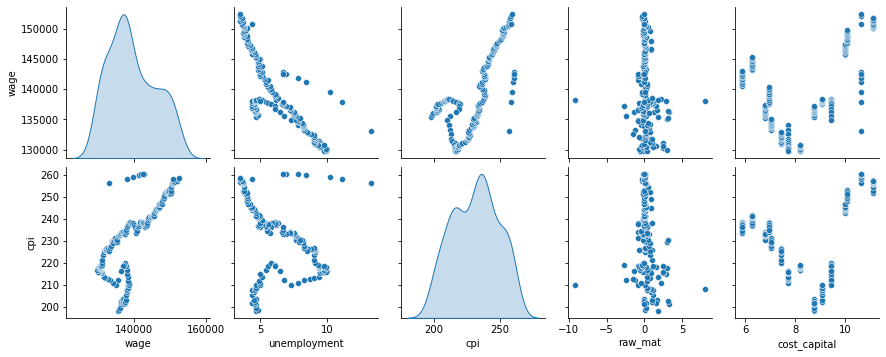

In [35]:
sns.pairplot(combined.drop(['year','month'],axis = 1),y_vars=['wage','cpi'], diag_kind='kde')
plt.show()

It appears that the `wage` and `cpi` have some sort of relationship with the other variables.

### 2.6. Correlation and Heatmap
We will now see how each column correlates to each other. The correlation table will exclude the column `year` and `month` since both are not useful for the modelling process. To do this, we will use the function `df.corr()`.

In [36]:
# Correlation table
combined.drop(['year','month'], axis = 1).corr().applymap(lambda x: abs(round(x,3)))

,wage,unemployment,cpi,raw_mat,cost_capital
wage,1.000,0.827,0.736,0.108,0.482
unemployment,0.827,1.000,0.264,0.016,0.349
cpi,0.736,0.264,1.000,0.172,0.286
raw_mat,0.108,0.016,0.172,1.000,0.014
cost_capital,0.482,0.349,0.286,0.014,1.000


Heatmap is also a good visualization to show the correlation of each column with other columns. The `sns.heatmap()` function is a quick solution for *heatmap* visualization. Lighter colors indicate a higher correlation. On the other hand, dark colors show a lower correlation. We also do *mask* to close correlations $Corr(i,i)$ and similar correlations (e.g. $ Corr(p,q)=Corr(q,p) $)

Text(0.5, 1.02, 'Heatmap of Absolute Correlation')

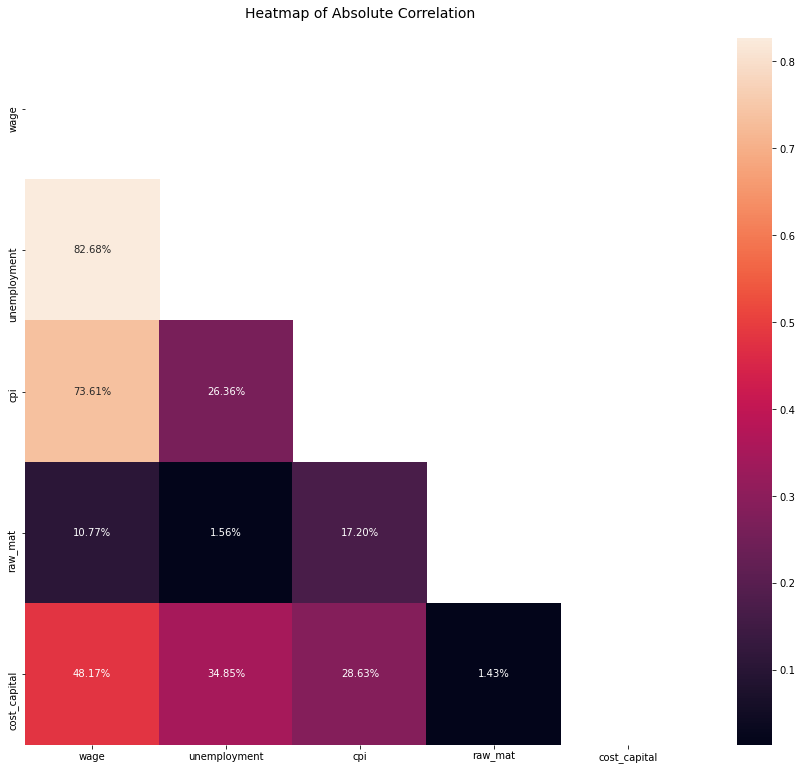

In [37]:
# Plotting a heatmap
plt.figure(figsize=(15,13))
mask = np.triu(np.ones_like(combined.drop(['year','month'], axis = 1).corr().abs(), dtype = np.bool))
sns.heatmap(combined.drop(['year','month'], axis = 1).corr().abs(),annot = True,fmt = '.2%',mask = mask)

# Plot settings
plt.title('Heatmap of Absolute Correlation',fontsize = 14,y = 1.02)

From the correlations above:

1. `wage` and `cpi` have high correlation ($73.61\%$) which is good considering that this a simultaneous equation model.
2. `wage` and `unemployment` have high correlation ($82.68\%$).
3. Both `cpi` againts `raw_mat`, and against`cost_capital` have a small correlation.

## 3. Modelling the Data

In this step, we using the <b>Simultaneous Equation Models (SEM)</b> to model the data. First of all, we need to check whether there is simultaneous equation or not, using the Hausman's Test. A test of simultaneity is essentially a test of whether an endogeneous regressor is correlated with the error term. 

### 3.1. Hausman's Test for Endogeneity

The Hausman test will involves the following steps: <br>
<b>Step 1.</b> Regress the `wage` on `unemployment`,`raw_mat`,and `cost_capital`. <br>
<b>Step 2.</b> Regress the `cpi` on `Prediction Step 1` and `Residual Step 1`. <br>
<br>
We can use `sm.OLS(y,x)` to do the regression.

In [38]:
# Using OLS to find the regression
feature = ['unemployment','cost_capital','raw_mat']
x = sm.add_constant(combined[feature])
y = combined['wage']

# Modelling step 1
LR = sm.OLS(y,x)
model1 = LR.fit()
pred = model1.predict(x)
res = y-pred

# Modelling step 2
temp_df = pd.DataFrame({'pred':pred,'res':res})
x2 = sm.add_constant(temp_df)
y2 = combined['cpi']
LR2 = sm.OLS(y2,x2)
model2 = LR2.fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cpi   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     794.3
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           7.96e-89
Time:                        16:12:56   Log-Likelihood:                -554.17
No. Observations:                 179   AIC:                             1114.
Df Residuals:                     176   BIC:                             1124.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.2636     10.214      9.033      0.000      72.106     112.421
pred           0.0010   7.32e-05     13.605      0.000       0.001       0.001
res            0.0046      0.000     37.463      0.000       0.004       0.005
==============================================================================
Omnibus:                       11.988   Durbin-Watson:                   0.454
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               21.436
Skew:                           0.311   Prob(JB):                     2.21e-05
Kurtosis:                       4.577   Cond. No.                     3.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We need to use the <b>Hypothesis testing</b> to prove the simultaneous of the models. If there is significances to the model, then the simultaneous problem exists.

<b>Hypothesis testing for $\beta_{res}$:</b><br>
$$H_{0}: \beta_{res}=0$$ <br>
$$H_{1}: \beta_{res}\neq0$$ <br>
<b>Decision Rule:</b> <br> 
$H_{0}$ is rejected if $P\text{-value}$ < $\alpha = 0.05$. <br>
<b>Conclusion:</b> <br>
$H_{0}$ is rejected because  $P\text{-value}$ < $\alpha$. There is enough evidence to show that there is simultaneity problem in this model.<br>

### 3.2. Train Test Split
We will now splitting our train set and our test set using `train_test_split()`. For this exercise, we will set the `train_size` and `test_size` to be $0.7$ and $0.3$, respectively. The dataset will not be shuffled before split into the `train` and `test` dataset (it will be chronologically ordered).

In [39]:
# Train test spliting the dataset
train, test = train_test_split(combined, train_size = 0.7, shuffle = False)
train = train.sort_index()
test = test.sort_index()

### 3.3. Modelling the Simultaneous Equations

<b>Cross-Validation</b> is a statistical method of evaluating and comparing learning algorithms by dividing data into two segments: one used to learn or train a model and the other used to validate the model. In this model, we make a function to calculate more accurate mean squared error and r-adj-squared using k-fold cross-validation.

In [40]:
# Defining metrics cross validation function
def cross_val_metrics(df,k,formula,y_col):
    mses = np.array([])
    adr2s = np.array([])
    
    # Defining the KFold indices
    kf = KFold(n_splits=k,random_state=0,shuffle=True)

    # Looping through the indeces
    for train_index, test_index in kf.split(df):
        # Splitting the train and test set
        train, test = df.iloc[train_index], df.iloc[test_index]

        # Fitting the model
        reg = IV2SLS.from_formula(formula,train).fit()
        pred = reg.predict(data = test)
        
        # calculating metrics
        mses = np.append(mses, mean_squared_error(test[y_col],pred))
        adr2s = np.append(adr2s, 1-(1-r2_score(test[y_col], pred))*((len(train)-1)/(len(train)-len(train.columns)-1)))
    # Calculating RMSE
    rmses = mses**0.5

    # Creating return dataframe
    return_df = pd.DataFrame({'mse':mses,'rmse':rmses,'adj.r2':adr2s})
    return return_df

#### 3.3.1. Modelling Wage

##### 3.3.1.1. Modelling using the Train Set

We will make the model using the `IV2SLS` formula which is available from the library `linearmodels.iv`, `.fit()`, and `.predict()` the `wage` of `train` set. We will first define the formula that we will use (which will be the same with the formula from our model) and then use the function `.from_formula()` to initialize the model.

In [41]:
# Defining the equation for wage
mod1 = 'wage ~ 1 + unemployment + [cpi ~ cost_capital + raw_mat]'

# Fitting our equation to the data
reg1 = IV2SLS.from_formula(mod1,train).fit()
pred1 = reg1.predict(data = train)

# Printing the result
reg1

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                   wage   R-squared:                      0.9653
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9647
No. Observations:                 125   F-statistic:                    3016.3
Date:                Sun, Jul 11 2021   P-value (F-stat)                0.0000
Time:                        16:12:56   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                               
================================================================================
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
Intercept     1.137e+05     1219.1     93.228     0.0000   1.113e+05    1.16e+05
unemployment    -1881.5     34.261    -54.918     0.0000     -1948.7     -1814.4
cpi              158.55     6.0093     26.384     0.0000      146.77      170.33
================================================================================

Endogenous: cpi
Instruments: cost_capital, raw_mat
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x7f90bbc8aa00

From the data summary above, the R-squared score is $0.9653$ with Adj. R-squared is $0.9647$, which is good. We can also see that all of the variables in this model are significant. 

To make sure, we also use the function `.wu_hausman()` to test the model using <b>the Hausman Test</b>.

In [42]:
# Endogeniety testing for the first regression
reg1.wu_hausman()

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 4.2319
P-value: 0.0418
Distributed: F(1,121)
WaldTestStatistic, id: 0x7f90bbc51520

The Hausman Test above shows the  $P\text{-value} = 0.0418$, which is below the $\alpha = 0.05$.<br>
So, we can conclude that <b>there is simultaneity</b> in this model.

Then, we calculate the **Mean Squared Error (MSE)** and **RMSE (Root Mean Squared Error)**. **Mean Squared Error (MSE)** measures the average of the squares of the errors (the difference between the estimated values and the actual values). On the other hand, **RMSE (Root Mean Squared Error)** is the square root of the mean of the square of all the error. RMSE is good to compare prediction errors of different models.

In [43]:
# Mean Squared Error of the train set for wage
mse_train_wage = mean_squared_error(train['wage'],pred1)

# Root Mean Squared Error of the train set for wage
rmse_train_wage = np.sqrt(mse_train_wage)

print('MSE of Train Wage is {}'.format(mse_train_wage))
print('RMSE of Train Wage is {}'.format(rmse_train_wage))

MSE of Train Wage is 507225.0198701716
RMSE of Train Wage is 712.1973180728579


From the data result above, we get the **MSE of train wage** is $507,225.01987032744$
RMSE of Train Wage is
and the **RMSE of train wage** is $712.1973180729674$.

After that, we plot the residuals of the `train` set using `matplotlib`.

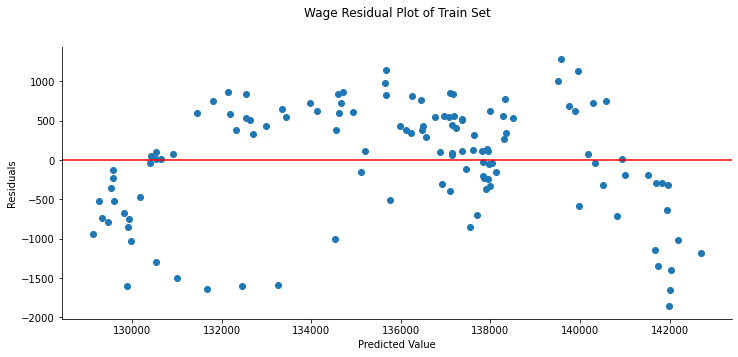

In [44]:
# Plotting the residuals
fig,(ax1) = plt.subplots(1,1,figsize = (12,5))
ax1.scatter(pred1['predictions'],pred1['predictions']-train.wage)

# Plot Settings
ax1.axhline(0,color = 'r')
ax1.set_title('Wage Residual Plot of Train Set',y = 1.09)
ax1.set_xlabel('Predicted Value')
ax1.set_ylabel('Residuals')
sns.despine()
plt.show()

We then make the visualization of the `wage` for `train`. Set to compare the actual and predicted value. The x-axis will be the index of the dataset.

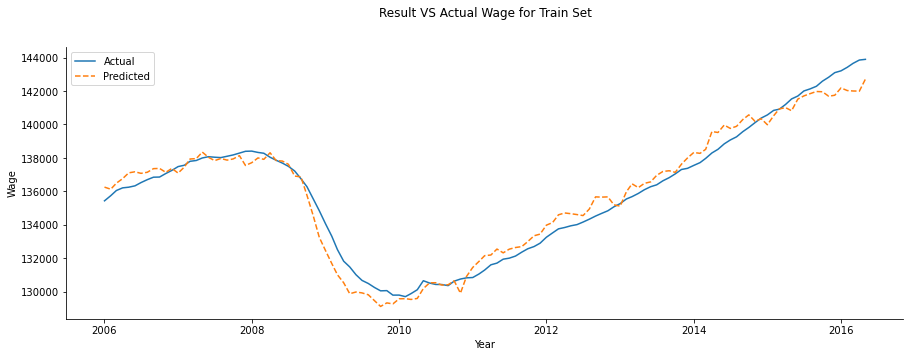

In [45]:
# Plotting the result of 2sls against the actual
fig,ax1=plt.subplots(1,1,figsize = (15,5))
ax1.plot(train['wage'],label = 'Actual')
ax1.plot(pred1, label = 'Predicted', linestyle = 'dashed')

# Plot settings
ax1.set_title('Result VS Actual Wage for Train Set', y = 1.09)
ax1.set_xlabel('Year')
ax1.set_ylabel('Wage')
ax1.legend()
sns.despine()

plt.show()

As we can see from the graph above, the actual and prediction values are close enough. So we can conclude that the model is good to predict the `wage` of  `train` set.

##### 3.3.1.2. Testing the Wage Model

We do the same thing as the train data above, but here we are predicting the `wage` for `test` set.

In [46]:
# Predicting the test set
pred_test1 = reg1.predict(data = test)

# Mean Squared Error of the test set for wage
mse_test_wage = mean_squared_error(test['wage'],pred_test1)

# Root Mean Squared Error of the train set for wage
rmse_test_wage = np.sqrt(mse_test_wage)

print('MSE of Test Wage is {}'.format(mse_test_wage))
print('RMSE of Test Wage is {}'.format(rmse_test_wage))

MSE of Test Wage is 8523641.401975498
RMSE of Test Wage is 2919.527599111798


From the data result above, we get the **MSE of test wage** is $8,523,641.401926743$ and the **RMSE of test wage** is $2,919.5275991034478$.

After that, we plot the residuals of the `test` set using `matplotlib`.

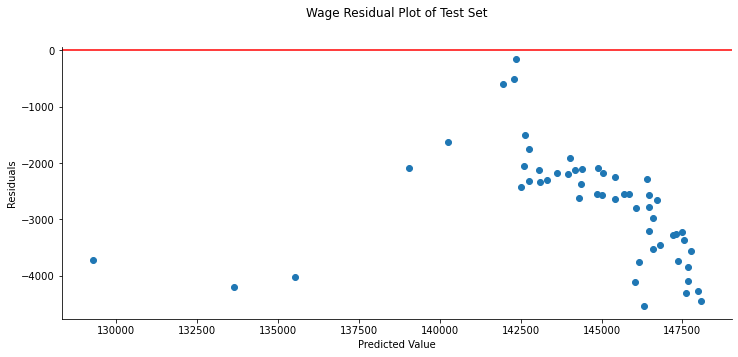

In [47]:
# Plotting the residuals
fig,(ax1) = plt.subplots(1,1,figsize = (12,5))
ax1.scatter(pred_test1['predictions'],pred_test1['predictions']-test.wage)

# Plot Settings
ax1.axhline(0,color = 'r')
ax1.set_title('Wage Residual Plot of Test Set',y = 1.09)
ax1.set_xlabel('Predicted Value')
ax1.set_ylabel('Residuals')
sns.despine()

plt.show()

We then make the visualization of the `wage` for `test` et to compare the actual and predicted value.

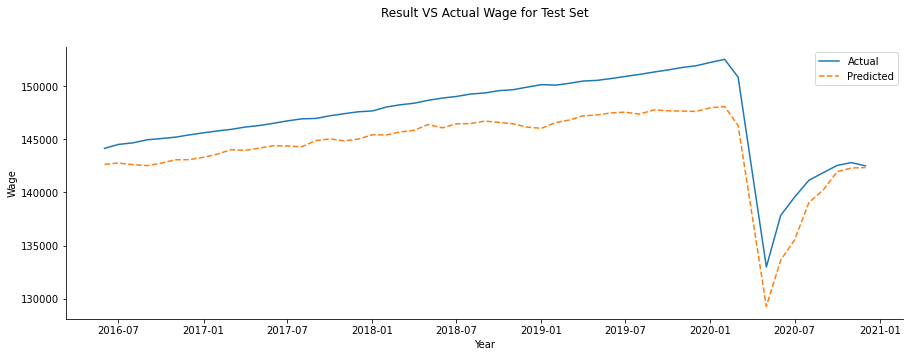

In [48]:
# Plotting the result of 2sls against the actual
fig,ax1=plt.subplots(1,1,figsize = (15,5))
ax1.plot(test['wage'],label = 'Actual')
ax1.plot(pred_test1, label = 'Predicted', linestyle='dashed')

# Plot settings
ax1.set_title('Result VS Actual Wage for Test Set', y = 1.09)
ax1.set_xlabel('Year')
ax1.set_ylabel('Wage')
ax1.legend()
sns.despine()

plt.show()

As we can see from the graph above, the actual and prediction values are slightly close. So we can conclude that the model is good to predict the `wage` of `Test Set`.

##### 3.3.1.3. Cross Validating the Wage Model

In [49]:
# Cross validation
cross_val_metrics(combined,5,mod1,'wage').mean().rename(lambda x:'K = '+str(5)+' cross validated of wage '+x+' is ',axis = 1)

K = 5 cross validated of wage mse is        4.903842e+06
K = 5 cross validated of wage rmse is       2.135152e+03
K = 5 cross validated of wage adj.r2 is     8.661810e-01
dtype: float64

After using the `cross_val_metrics()` function with **K = 5**, the cross validated of `wage` **MSE** is $ 4.903842*10^6$, the cross validated of `wage` **RMSE** is $2.135152*10^3$, and the cross validated of `wage` $\text{Adj. R}^2$ is $0.866$.

#### 3.3.2. Modelling the CPI

##### 3.3.2.1. Modelling the Train Set

We will make the model using the `IV2SLS` formula which is available from the library `linearmodels.iv`, `.fit()`, and `.predict()` the `cpi` of `train` set. We will first define the formula that we will use (which will be the same with the formula from our model) and then use the function `.from_formula()` to initialize the model.

In [50]:
# Defining the equation for CPI
mod2 = 'cpi ~ 1 + raw_mat + cost_capital + [wage ~ unemployment]'

# Fitting the dataset to the equation
reg2 = IV2SLS.from_formula(mod2,train).fit()
pred2 = reg2.predict(data = train)

# Printing the result
reg2

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                    cpi   R-squared:                      0.7624
Estimator:                    IV-2SLS   Adj. R-squared:                 0.7565
No. Observations:                 125   F-statistic:                    414.88
Date:                Sun, Jul 11 2021   P-value (F-stat)                0.0000
Time:                        16:12:57   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                               
================================================================================
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
Intercept        297.37     21.123     14.078     0.0000      255.97      338.77
raw_mat         -0.7316     0.3839    -1.9059     0.0567     -1.4839      0.0208
cost_capital    -9.5966     0.6173    -15.547     0.0000     -10.806     -8.3868
wage         -8.499e-06     0.0001    -0.0632     0.9496     -0.0003      0.0003
================================================================================

Endogenous: wage
Instruments: unemployment
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x7f90bce95cd0

From the data summary above, the R-squared score is $0.7624$ with Adj. R-squared is $0.7565$, which is good. We can also see that all of the variables in this model are significant. 

To make sure, we also use the function `.wu_hausman()` to test the model using <b>the Hausman Test</b>.

In [51]:
# Endogeniety testing for the second regression
reg2.wu_hausman()

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 142.1349
P-value: 0.0000
Distributed: F(1,120)
WaldTestStatistic, id: 0x7f90bc3b97c0

The Hausman Test above shows the  $P\text{-value} = 0.0000$, which is below the $\alpha = 0.05$.<br>
So, we can conclude that <b>there is simultaneity</b> in this model.

Then, we calculate the **Mean Squared Error (MSE)** and **RMSE (Root Mean Squared Error)**. **Mean Squared Error (MSE)** measures the average of the squares of the errors (the difference between the estimated values and the actual values). On the other hand, **RMSE (Root Mean Squared Error)** is the square root of the mean of the square of all the error. RMSE is good to compare prediction errors of different models. We calculate the **MSE** and **RMSE** for `train` set of `cpi`, as we have done above.

In [52]:
# Mean Squared Error of the train set for CPI
mse_train_cpi = mean_squared_error(train['cpi'],pred2)

# Root Mean Squared Error of the train set for CPI
rmse_train_cpi=np.sqrt(mse_train_cpi)

print('MSE of Train CPI is {}'.format(mse_train_cpi))
print('RMSE of Train CPI is {}'.format(rmse_train_cpi))

MSE of Train CPI is 34.67530550539872
RMSE of Train CPI is 5.888574148756108


From the data result above, we get the **MSE of train cpi** is $34.675305505398796$ and the **RMSE of train cpi** is $
5.888574148756114$.

After that, we plot the residuals of the `train` set using `matplotlib`.

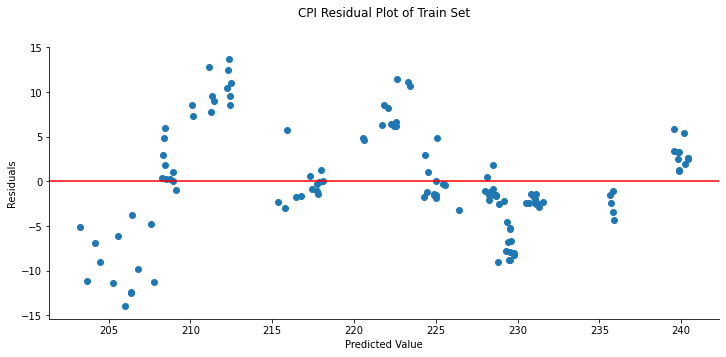

In [53]:
# Plotting the residuals
fig,(ax1) = plt.subplots(1,1,figsize = (12,5))
ax1.scatter(pred2['predictions'],pred2['predictions']-train.cpi)

# Plot Settings
ax1.axhline(0,color = 'r')
ax1.set_title('CPI Residual Plot of Train Set',y = 1.09)
ax1.set_xlabel('Predicted Value')
ax1.set_ylabel('Residuals')
sns.despine()

plt.show()

We then make the visualization of the `cpi` for `train`. Set to compare the actual and predicted value. The x-axis will be the index of the dataset.

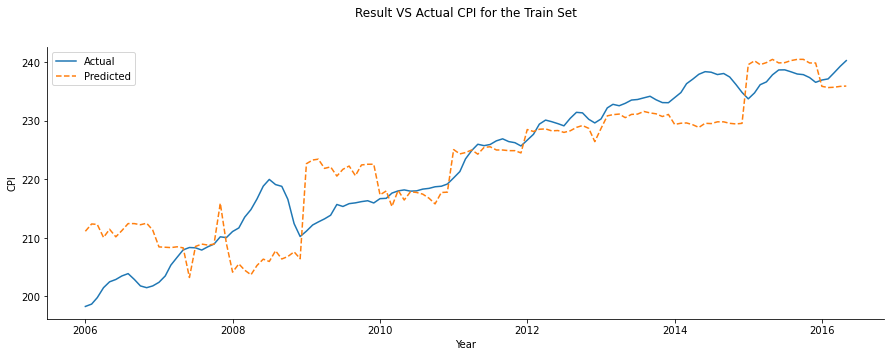

In [54]:
# Plotting the result of 2sls against the actual
fig,ax1=plt.subplots(1,1,figsize = (15,5))
ax1.plot(train['cpi'],label = 'Actual')
ax1.plot(pred2, label = 'Predicted', linestyle = 'dashed')

# Plot settings
ax1.set_title('Result VS Actual CPI for the Train Set', y = 1.09)
ax1.set_xlabel('Year')
ax1.set_ylabel('CPI')
ax1.legend()
sns.despine()

plt.show()

As we can see from the graph above, the actual and prediction values are quite close. So we can conclude that the `train` set is good to predict the `cpi` of  `train` set.

##### 3.3.2.2. Testing the CPI Model

We do the same thing as the train data above, but here we are predicting the `cpi` for `Test Set`.

In [55]:
# Predicting the result of the test set
pred_test2 = reg2.predict(data = test)

# Mean Squared Error of the test set for CPI
mse_test_cpi = mean_squared_error(test['cpi'],pred_test2)

# Root Mean Squared Error of the train set for CPI
rmse_test_cpi = np.sqrt(mse_test_cpi)

print('MSE of Test CPI is {}'.format(mse_test_cpi))
print('RMSE of Test CPI is {}'.format(rmse_test_cpi))

MSE of Test CPI is 2881.300291384511
RMSE of Test CPI is 53.67774484257429


From the data result above, we get the **MSE of test cpi** is $2881.3002913723617$ and the **RMSE of test cpi** is $53.677744842461124$.

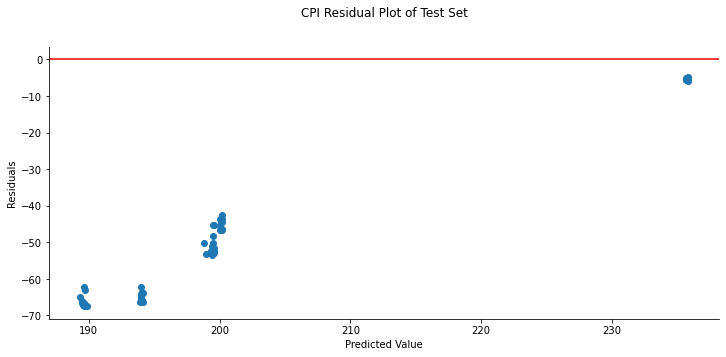

In [56]:
# Plotting the residuals
fig,(ax1) = plt.subplots(1,1,figsize = (12,5))
ax1.scatter(pred_test2['predictions'],pred_test2['predictions']-test.cpi)

# Plot Settings
ax1.axhline(0,color = 'r')
ax1.set_title('CPI Residual Plot of Test Set',y = 1.09)
ax1.set_xlabel('Predicted Value')
ax1.set_ylabel('Residuals')
sns.despine()

plt.show()

We can see that the residual plot does not have a distinctly noticeable pattern.

After that, we plot the residuals of the `test` set using `matplotlib`.

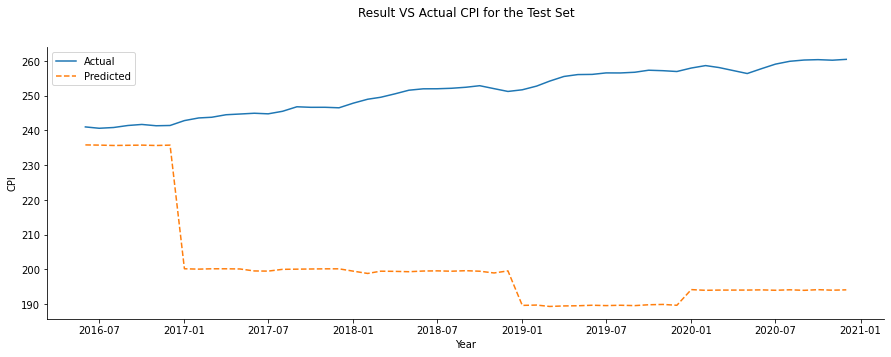

In [57]:
# Plotting the result of 2sls against the actual
fig,ax1=plt.subplots(1,1,figsize=(15,5))
ax1.plot(test['cpi'],label = 'Actual')
ax1.plot(pred_test2, label = 'Predicted', linestyle = 'dashed')

# Plot settings
ax1.set_title('Result VS Actual CPI for the Test Set', y = 1.09)
ax1.set_xlabel('Year')
ax1.set_ylabel('CPI')
ax1.legend()
sns.despine()

plt.show()

##### 3.3.2.3. Cross Validating the CPI Model

In [58]:
# Cross validation
cross_val_metrics(combined,5,mod2,'cpi').mean().rename(lambda x:'K = '+str(5)+' cross validated of CPI '+x+' is ',axis = 1)

K = 5 cross validated of CPI mse is        206.029638
K = 5 cross validated of CPI rmse is        14.327336
K = 5 cross validated of CPI adj.r2 is       0.196666
dtype: float64

After using the `cross_val_metrics()` function with **K = 5**, the cross validated of `cpi` **MSE** is $206.029638$, the cross validated of `cpi` **RMSE** is $14.327336$, and the cross validated of `cpi` $\text{Adj. R}^2$ is $0.196666$.

### 3.4. Assumption Testing
Because we are using a system of Simultaneous Equation Model (SEM), we need to confirm whether our result fits several classical assumptions, namely:

1. Multicollinearity --> The regressors should not be highly linearly correlated to each other
2. Normality --> The regression's error should be normally distributed
3. Heteroscedasticity --> The variance of the error term should be constant

#### 3.4.1. Multicollinearity
First we are going to test whether our features have multicollinearity problem. One way of checking this is to calculate the **Variance Inflation Factor** or VIF in short. A VIF of $5$ or higher can be considered to have a high probability of multicollinearity problem. We will make a function to calculate the VIF of our data by using the `variance_inflaction_factor()` function from `statsmodels`. The 

<b>Hypothesis testing for multicollinearity:</b><br>
$$H_{0}: \text{There is no multicollinearity problem}$$ <br>
$$H_{1}: \text{There is multicollinearity problem}$$ <br>
<b>Decision Rule:</b> <br> 
$H_{0}$ is rejected if $\text{VIF} > 5$. <br>


In [59]:
#Make a function to calculate vif
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variable']=x.columns
    vif['vif']=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return(vif)

Next we will check the VIF for each model's regressor. As a reminder, the system of equation we are using is:

$\dot{W}_t=\alpha_{0}+\alpha_{1}\text{UN}_t+\alpha_{2}{\dot{P}}_t+u_{1t}$

$\dot{P}_t=\beta_{0}+\beta_{1}\dot{W}_t+\beta_{2}\dot{R}_t+\beta_{3}\dot{M}_t+u_{2t}$

When we are checking VIF, we will exclude our endogeneous variables (since these variables will be highly correlated to each other). 

The Wage Equation ($\dot{W}_t$) only have one non-endogeneous variable, thus it is impossible for this equation to have multicollinearity problem. We will now calculate the Price Equation ($\dot{P}_t$).

In [60]:
vif1 = combined[['raw_mat','cost_capital']]
calc_vif(vif1)

,variable,vif
0,raw_mat,1.032002
1,cost_capital,1.032002


The VIF for both columns are $1.032001611175605
$ which is less than $5$, thus we can conclude that the regressors for the Price Equation do not have multicollinearity problem.

#### 3.4.2. Normality
We will now check the normality of the errors using the **D'Agostino's K-Squared test**, a test of normality based on skewness and kurtosis. The hypothesis we are testing is:

<b>Hypothesis testing for normality:</b><br>
$$H_{0}: \text{The errors are normally distributed}$$ <br>
$$H_{a}: \text{The errors are not normally distributed}$$ <br>
<b>Decision Rule:</b> <br> 
$H_{0}$ is rejected if $P\text{-value (D'Agostino's K-Squared test)} < \alpha = 0.05$. <br>

We will be using the `normaltest()` function available from `scipy.stats`.

In [61]:
# Calculating D'Agostino for the residuals of the Wage model 
print("D'Agostino of Train P-Value  =  {a}\nD'Agostino of Test P-value   =  {b}".format(
                                                                a = normaltest(pred1['predictions']-train.wage)[1],
                                                                b = normaltest(pred_test1['predictions']-test.wage)[1]
                                                                )
                                                            )

D'Agostino of Train P-Value  =  0.009754324829983473
D'Agostino of Test P-value   =  0.6393494676237732


In [62]:
# Calculating D'Agostino for the residuals of the Price model 
print("D'Agostino of Train P-Value  =  {a}\nD'Agostino of Test P-value   =  {b}".format(
                                                                a = normaltest(pred2['predictions']-train.cpi)[1],
                                                                b = normaltest(pred_test2['predictions']-test.cpi)[1]
                                                                )
                                                            )

D'Agostino of Train P-Value  =  0.8522208409501159
D'Agostino of Test P-value   =  0.00018286596649955258


<table>
    <thead>
        <tr>
            <th>Model</th>
            <th>Dataset</th>
            <th>P-Value</th>
            <th>Decision (H0)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan=2>Wage</td>
            <td>Train</td>
            <td>0.009754324830096384</td>
            <td>rejected</td>
        </tr>
        <tr>
            <td>Test</td>
            <td>0.6393494676195509</td>
            <td>not rejected</td>
        </tr>
        <tr>
            <td rowspan=2>Price</td>
            <td>Train</td>
            <td>0.8522208409497827</td>
            <td>not rejected</td>
        </tr>
        <tr>
            <td>Test</td>
            <td>0.000182865966499591
</td>
            <td>rejected</td>
        </tr>
    </tbody>
</table>

We can see that the result of the **D'Agostino's K-squared test** that there are two residuals which are not normally distributed, those residuals came from the `train` set of the `wage` model and the `test` set of the `cpi` model

#### 3.4.3 Heteroscedasticity
Heteroscedasticity will happen when the standard deviations of the predicted variable, monitored over different values of an independent variable or as related to prior time periods, are non-constant. The assumption is that we can make a good model if the error of the variance is constant over time. One of the tools that can be used to test the heteroscedasticity is using the **Breusch-Pagan Test**. This tool is available from `statsmodels` package using the function `het_breuschpagan()`. 

<b>Hypothesis testing for heteroscedasticity:</b><br>
$$H_{0}: \text{The errors are homoscedastic}$$ <br>
$$H_{a}: \text{The errors are heteroscedastic}$$ <br>
<b>Decision Rule:</b> <br> 
$H_{0}$ is rejected if $P\text{-value (Breusch-Pagan test)} < \alpha = 0.05$. <br>

In [63]:
# Defining the model
m1 = 'wage ~ 1 + unemployment + cpi'

# Calculating Breusch-Pagan Test for the residuals of the Wage model
y1, X1=dmatrices(m1,train,return_type='dataframe')
a1 = het_breuschpagan(pred1['predictions']-train.wage, X1)[1]

y2, X2=dmatrices(m1,test,return_type='dataframe')
a2 = het_breuschpagan(pred_test1['predictions']-test.wage,X2)[1]

# Printing the result
print('Breusch-Pagan of Wage Train statistic =  {a}\nBreusch-Pagan of Wage Test statistic  =  {b}'.format(
                                                                a = a1,
                                                                b = a2)
                                                                )
                                                            

Breusch-Pagan of Wage Train statistic =  0.32558276716345463
Breusch-Pagan of Wage Test statistic  =  0.0008135307925458825


As we can see from the **Breusch-Pagan test** above, the statistic of `wage` Train is $ 0.32558276714959444$ and the statistic of `wage` Test is $0.0008135307925442346$. It indicates there is homoscedastisticy in `Wage` Train equation  and heteroscedasticity problem in `Wage` Test equation.

In [64]:
# Defining the model
m2 = 'cpi ~ 1 + raw_mat + cost_capital + wage'

# Calculating Breusch-Pagan Test for the residuals of the Wage model
y1, X1=dmatrices(m2,train,return_type='dataframe')
a1 = het_breuschpagan(pred1['predictions']-train.cpi, X1)[1]
y2, X2=dmatrices(m2,test,return_type='dataframe')
a2 = het_breuschpagan(pred_test1['predictions']-test.cpi,X2)[1]

# Printing the result
print('Breusch-Pagan of CPI Train statistic =  {a}\nBreusch-Pagan of CPI Test statistic  =  {b}'.format(
                                                                a = a1,
                                                                b = a2)
                                                                )
                                                            

Breusch-Pagan of CPI Train statistic =  4.4564513828717575e-26
Breusch-Pagan of CPI Test statistic  =  4.2268344982375606e-11


As we can see from the **Breusch-Pagan test** above, the statistic of `cpi` Train is $\text4.45645138287269 * 10^{-26}$ and the statistic of `cpi` Test is $\text4.226834498236842 * 10^{-11}$. It indicates there is heteroscedasticity problem in `cpi` Train and Test equation.

## 4. Conclusion

The Simultaneous Equation Model of Philips-type model of money-wage and price determination:

$\dot{W}_t=1.137*10^5-1881.5\space\text{UN}_t+158.55\space\dot{P}_t+u_{1t}$

$\dot{P}_t\space=297.37-8.499*10^{-6}\space\dot{W}_t-9.5966\space\dot{R}_t-0.7316\space\dot{M}_t+u_{2t}$

**Where**:
- $\dot{W}$ = Money Wages
- $\dot{UN}$ = Unemployment Rate, % 
- $\dot{P}$ = Price
- $\dot{R}$ = Rate of Change of Cost of Capital 
- $\dot{M}$ = Prices of Imported Raw Material 
- $t$ = Time 
- $u_1,u_2$= Stochastic Disturbances 


## 5. Bibliography

#### Datasets:
* [NYU Stern School of Businesses](http://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/wacc.html)
* [U.S. Bureau of Labor Statistics](https://data.bls.gov/)

#### Information:
 - Gujarati, D.N. & Porter.D.C..2009. *Basic Econometrics*. 5th edition. New York: McGraw-Hill/Irwin 
 - [Linear Models Documentation](https://bashtage.github.io/linearmodels/doc/iv/examples/advanced-examples.html)
 - [Simultaneous Equation Model](https://www.bauer.uh.edu/rsusmel/phd/ec1-16.pdf)
 - [10 Normality Test in Python](https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f344fdb6-0030-46d9-ae4f-6cc4df958bab' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>